In [1129]:
! pip3 install numpy opencv-python matplotlib imutils scipy pypi

You should consider upgrading via the 'c:\users\zlata\desktop\ipf\projects\area\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [1130]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
import imutils as im
from imutils import perspective
from imutils import contours
from scipy.spatial import distance as dist
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import Image

In [1131]:
# Define the size of a reference object
# Black dot diameter:

dot_d = 22# mm

# Calculate the area of a reference object

dot_area = (dot_d/2)**2 * math.pi # mm2
print(dot_area)

380.132711084365


In [1135]:
# Define the path to the image

gel = cv2.imread(f"insert path here")

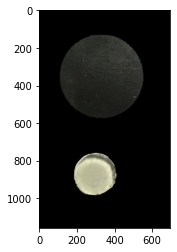

In [1136]:
# Show original image

plt.imshow(cv2.cvtColor(gel, cv2.COLOR_BGR2RGB))
plt.show()

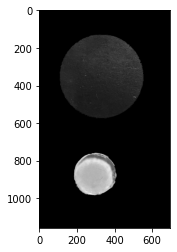

In [1137]:
# Convert image to grayscale and blur it

gel_gray = cv2.cvtColor(gel, cv2.COLOR_BGR2GRAY)
gel_gray_blur = cv2.GaussianBlur(gel_gray, (1, 1), 0) # Tip: set blurring factor (n, m) to minimum to avoid
# opened contours; change the blurring factors, if needed; use only odd numbers

# Show the changed image

plt.imshow(cv2.cvtColor(gel_gray_blur, cv2.COLOR_BGR2RGB))
plt.show()

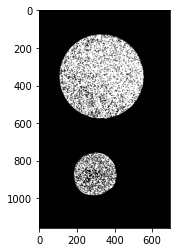

In [1138]:
# Edge (contour) detection

gel_edged = cv2.Canny(gel_gray_blur,10,10)
gel_edged = cv2.dilate(gel_edged, None, iterations=1)
gel_edged = cv2.erode(gel_edged, None, iterations=1)

# Show calculated contours

plt.imshow(cv2.cvtColor(gel_edged, cv2.COLOR_BGR2RGB))
plt.show()


In [1139]:
# Define contours for size calculations

def get_contours(img):

    # find all the contours from the B&W image
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # array with filtered contours of interest
    final_contours = []

    # for each contour found
    for cnt in contours:
        # find its area in pixel
        area = cv2.contourArea(cnt)
        print("Detected Contour with Area: ", area)

        # minimum area value is to be fixed as the one that leaves the reference object
        # as the small object on the scene
        if area > 5000:
            final_contours.append([area])

    # check the number of found contours

    print("---\nFinal number of filtered contours: ", len(final_contours))

    return final_contours


In [1140]:
# Find contours and calculate the area of the objects in pixel

final_contours = get_contours(gel_edged)

# second final contour: coin area in pixel
coin_size_pixel = str(*final_contours[1])
print("Coin Area in pixel", coin_size_pixel)

# second final contour: gel area in pixel
gel_size_pixel = str(*final_contours[0])
print("Gel Area in pixel", gel_size_pixel)

# Note: reference object is in our case bigger, than the one of the gel. Change contour number
# if needed (final_contours[1] to final_contours[0] or vice versa) for the right scaling

Detected Contour with Area:  39995.0
Detected Contour with Area:  0.0
Detected Contour with Area:  155830.5
---
Final number of filtered contours:  2
Coin Area in pixel 155830.5
Gel Area in pixel 39995.0


In [1141]:
# Function: convert area in pixel to area in mm2

def pixel_to_area(gel_pixel, coin_pixel):
    # how many mm^2 per pixel?
    area_per_pixel = dot_area / coin_pixel
    print("Real area per pixel in mm^2: ", area_per_pixel)
    # hydrogel area in mm^2:
    area_mm = area_per_pixel * gel_pixel
    return area_mm

In [1142]:
# Calculate the gel area in mm2

gel_area_mm = pixel_to_area(float(gel_size_pixel), float(coin_size_pixel))
print('Gel area in mm^2: ', gel_area_mm)



Real area per pixel in mm^2:  0.002439398648431244
Gel area in mm^2:  97.56374894400761
